<div style="text-align: left;">
    <div style="font-size: 300%">
        1. Preprocess
    </div>
</div>

1-1. Import libraries

In [14]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FuncFormatter, ScalarFormatter
from industries import get_industries_id, get_industries_name
from linearmodels import PanelOLS

1-2. Change working directory

In [2]:
# Move to /graspp-25S-innovation
# from e.g. 'c:/Users/Username/Git/graspp-25S-innovation/notebooks/assignment_group/HW2'
os.chdir('../../..')
os.getcwd()
# If you accidentally run this more than twice, the working directory might be incorrect, please click 'Restart' in VScode."

'c:\\Users\\ShumaSuzuki\\Git\\graspp-25S-innovation'

1-3. Load csv files and create concatenated dataframe

In [3]:
emp_data_path = "data/cleand/3 産業別、売上高経常利益率別常時従業者数"
r_and_d_data_path = "data/cleand/第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費"
patent_data_path = "data/cleand/第11表 産業別、企業数、特許権、実用新案権、意匠権別の所有件数及び使用件数"

patent_df_org, r_and_d_df_org, emp_df_org = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
patent_total_row_num, r_and_d_total_row_num, emp_total_row_num = 0, 0, 0

for file in os.listdir(patent_data_path):
    if file.endswith(".csv"):
        tmp_df = pd.read_csv(os.path.join(patent_data_path, file), encoding="utf-8")
        tmp_df = tmp_df.drop(columns = tmp_df.columns[0])
        tmp_df[["year"]] = file.split(".")[0]
        tmp_df[["year"]] = tmp_df[["year"]].astype(int)

        # Standardize and column names for merging
        tmp_df = tmp_df.rename(columns={
            "産業": "industry",
            "特許権_企業数": "patent_company_count",
            "特許権_企業数_社": "patent_company_count",
            "_特許権_企業数": "patent_company_count",
            "特許権_件数_所有数": "patent_count",
            "特許権_件数_所有数_件": "patent_count",
            "_特許権_件数_所有数": "patent_count",
            "実用新案権_企業数": "utility_company_count",
            "実用新案権_企業数_社": "utility_company_count",
            "実用新案権_件数_所有数": "utility_count",
            "実用新案権_件数_所有数_件": "utility_count",
            "意匠権_企業数": "design_company_count",
            "意匠権_企業数_社": "design_company_count",
            "意匠権_件数_所有数": "design_count",
            "意匠権_件数_所有数_件": "design_count"
        })

        patent_total_row_num += len(tmp_df)
        patent_df_org = pd.concat([patent_df_org, tmp_df])

for file in os.listdir(r_and_d_data_path):
    if file.endswith(".csv"):
        tmp_df = pd.read_csv(os.path.join(r_and_d_data_path, file), encoding="utf-8")
        tmp_df = tmp_df.drop(columns = tmp_df.columns[0])
        tmp_df[["year"]] = file.split(".")[0]
        tmp_df[["year"]] = tmp_df[["year"]].astype(int)

        # Standardize and column names for merging
        tmp_df = tmp_df.rename(columns={
            "産業": "industry",
            "研究開発_研究開発費_計": "r_and_d_total",
            "研究開発_研究開発費_計_百万円": "r_and_d_total",
            "研究開発_売上高（百万円）": "r_and_d_sales",
            "研究開発_売上高_百万円": "r_and_d_sales",
            "企業数": "company_count",
            "研究開発_企業数": "company_count"
        })

        r_and_d_total_row_num += len(tmp_df)
        r_and_d_df_org = pd.concat([r_and_d_df_org, tmp_df])


for file in os.listdir(emp_data_path):
    if file.endswith(".csv"):
        tmp_df = pd.read_csv(os.path.join(emp_data_path, file), encoding="utf-8")
        tmp_df = tmp_df.drop(columns = tmp_df.columns[0])
        tmp_df[["year"]] = file.split(".")[0]
        tmp_df[["year"]] = tmp_df[["year"]].astype(int)

        emp_total_row_num += len(tmp_df)
        emp_df_org = pd.concat([emp_df_org, tmp_df])

# Check for missing data
print(
    all([
        len(patent_df_org)  == patent_total_row_num,
        len(r_and_d_df_org) == r_and_d_total_row_num,
        len(emp_df_org) == emp_total_row_num
    ])
)

True


1-4. Descriptive statistics

In [6]:
print("The time period is from " + str(min(patent_df_org["year"])) + " to " + str(max(patent_df_org["year"])))
patent_df_org.describe().map(int)

The time period is from 2010 to 2023


,patent_company_count,patent_count,特許権_件数_使用のもの（含供与）_件,特許権_件数_使用のもの（含供与）_うち自社開発,utility_company_count,utility_count,実用新案権_使用のもの（含供与）_件,実用新案権_うち自社開発,design_company_count,design_count,...,year,特許権_件数_使用のもの（含供与）_うち、自社開発,実用新案権_うち、自社開発,意匠権_うち、自社開発,特許権_件数_所有数_使用のもの（含供与）_件,特許権_件数_所有数_使用のもの（含供与）_うち、自社開発_件,実用新案権_件数_所有数_使用のもの（含供与）_件,実用新案権_件数_所有数_使用のもの（含供与）_うち、自社開発_件,意匠権_件数_所有数_使用のもの（含供与）_件,意匠権_件数_所有数_使用のもの（含供与）_うち、自社開発_件
count,2161,1999,1420,276,2058,1658,1199,237,2105,1864,...,2184,1142,961,1076,578,574,475,476,526,527
mean,213,51788,17828,14000,74,761,406,363,115,7412,...,2016,16559,348,2970,20224,18650,374,334,3612,3396
std,905,216845,74537,57608,311,2900,1558,1379,485,30654,...,4,68840,1341,12258,84732,77536,1436,1288,14752,13908
min,1,3,1,5,1,3,1,1,1,3,...,2010,1,1,1,1,1,1,1,2,2
25%,15,385,194,176,5,31,20,18,8,128,...,2013,183,17,77,219,209,16,14,98,83
50%,38,4731,1643,1201,14,100,58,57,24,697,...,2017,1535,53,355,2050,1844,63,58,468,432
75%,112,19112,6702,5307,38,370,198,199,59,2688,...,2020,6546,161,1248,7120,6637,182,169,1567,1436
max,8450,1816213,591318,414236,2615,22490,11609,9420,4245,244062,...,2023,528397,10046,89781,653710,591211,10834,10000,114587,108433


In [7]:
print("The time period is from " + str(min(r_and_d_df_org["year"])) + " to " + str(max(r_and_d_df_org["year"])))
r_and_d_df_org.describe().map(int)

The time period is from 2010 to 2023


,研究開発_受託研究費（百万円）_うち、関係会社からの受託_国内（百万円）,研究開発_受託研究費（百万円）_うち、関係会社からの受託_海外（百万円）,year,_受託研究費（百万円）_うち、関係会社からの受託_海外（百万円）,_企業数
count,691,93,2238,230,152
mean,15305,4335,2016,8713,256
std,73950,9742,4,19769,1084
min,1,1,2010,1,1
25%,56,14,2013,42,15
50%,286,128,2016,387,51
75%,2006,2300,2020,5508,126
max,689393,53389,2023,105801,8529


In [8]:
print("The time period is from " + str(min(emp_df_org["year"])) + " to " + str(max(emp_df_org["year"])))
emp_df_org.describe().map(int)

The time period is from 2003 to 2021


,企業数,year,2%＜ 経常利益率 ≦4%
count,3398,3750,159
mean,2416,2010,276899
std,6383,5,599618
min,1,2003,119
25%,102,2005,10588
50%,363,2011,43396
75%,864,2016,137007
max,30647,2021,2640386


<div style="text-align: left;">
    <div style="font-size: 300%">
        2. Analysis
    </div>
</div>

2-1. Common process

2-1-1. Merge dataframe

In [4]:
patent_df, r_and_d_df, merged_patent_r_and_d_df = patent_df_org.copy(deep=True), r_and_d_df_org.copy(deep=True), pd.DataFrame()

# Narrow down to target columns
target_r_and_d_columns = [
    "year",
    "industry",
    "r_and_d_total",
    # "r_and_d_sales",
    # "company_count"
]
r_and_d_df = r_and_d_df[target_r_and_d_columns]
r_and_d_df[["industry_id"]] = r_and_d_df[["industry"]].map(get_industries_id)
r_and_d_df[["industry_name"]] = r_and_d_df[["industry_id"]].map(get_industries_name)

# Remove NaN rows
r_and_d_df = r_and_d_df.replace(["", "ｘ", "x", "Ｘ", "***"], np.nan)
r_and_d_df.dropna(subset=['r_and_d_total'], inplace=True)

# Narrow down to target columns
target_patent_columns = [
    "year",
    "industry",
    # "patent_company_count",
    "patent_count",
    # "utility_company_count",
    # "utility_count",
    # "design_company_count",
    # "design_count"
]
patent_df = patent_df[target_patent_columns]
patent_df[["industry_id"]] = patent_df[["industry"]].map(get_industries_id)
patent_df[["industry_name"]] = patent_df[["industry_id"]].map(get_industries_name)

# Remove rows with NaN
patent_df = patent_df.replace(["", "ｘ", "x", "Ｘ", "***"], np.nan)
patent_df.dropna(subset=['patent_count'], inplace=True)

# Merge on industry and add columns
if len(merged_patent_r_and_d_df) == 0:
    merged_patent_r_and_d_df = pd.merge(r_and_d_df, patent_df, on=["industry", "industry_id", "industry_name", "year"], how="inner")
else:
    merged_patent_r_and_d_df = pd.concat(
        [merged_patent_r_and_d_df,
            pd.merge(r_and_d_df, patent_df, on=["industry", "industry_id", "industry_name", "year"], how="inner")
        ]
    )

# Convert data type
merged_patent_r_and_d_df["industry"] = merged_patent_r_and_d_df["industry"].astype(str)
merged_patent_r_and_d_df["industry_id"] = merged_patent_r_and_d_df["industry_id"].astype(str)
merged_patent_r_and_d_df["patent_count"] = merged_patent_r_and_d_df["patent_count"].astype(int)
merged_patent_r_and_d_df["r_and_d_total"] = merged_patent_r_and_d_df["r_and_d_total"].astype(int)

2-1-2. Japanese font setting

In [5]:
# Please specify the Japanese font installed on your computer.
fname = r'c:\Windows\Fonts\meiryo.ttc' if sys.platform == 'win32' else '/Library/Fonts/Arial Unicode.ttf'
fp = FontProperties(fname = fname)
plt.rc('font', family=fp.get_name())

<div style="font-size: 150%">
    2-2. Show Scatter plots: R&D費用 vs 特許件数
</div>

2-2-1. Hypothesis: Scatter plots(R&D費用 vs 特許件数)<br>
According to 骨太の方針 and previous studies … (TODO)

2-2-2. Scatter plot: R&D費用 vs 特許件数

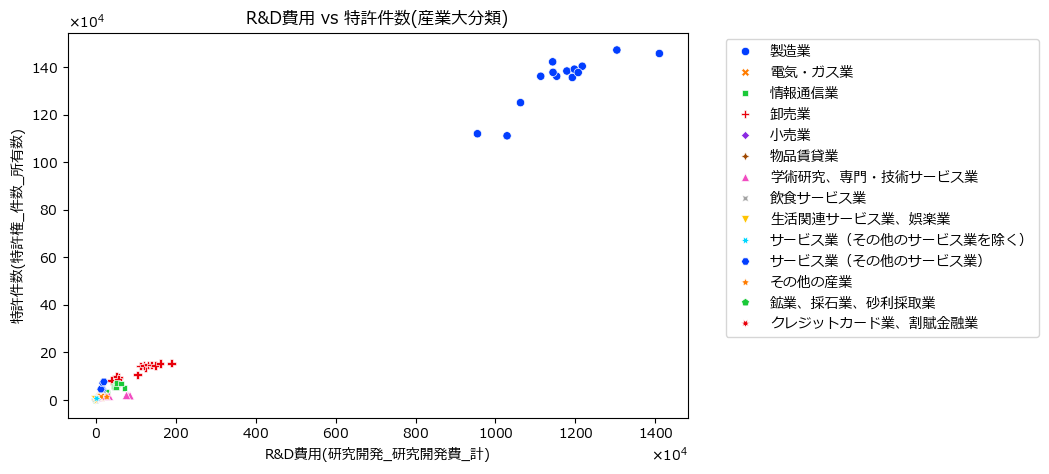

In [39]:
# Scatter plot: R&D費用 vs 特許件数(産業大分類)

#Filter by main categories
target_index = merged_patent_r_and_d_df["industry_id"].apply(len).isin([1,2])

plt.figure(figsize=(8, 5))
ax = sns.scatterplot(data=merged_patent_r_and_d_df[target_index], x="r_and_d_total", y="patent_count", hue="industry_name", palette="bright", style="industry_name")
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((4, 4))
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
plt.xlabel("R&D費用(研究開発_研究開発費_計)")
plt.ylabel("特許件数(特許権_件数_所有数)")
plt.title("R&D費用 vs 特許件数(産業大分類)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

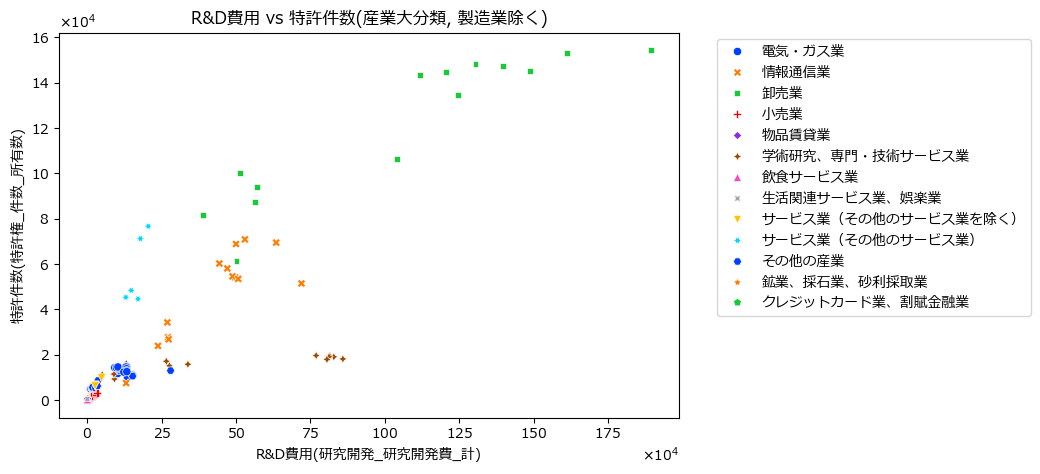

In [40]:
# Scatter plot: R&D費用 vs 特許件数(産業大分類, 製造業除く)

#Filter by main categories and Exclude the manufacturing industry
target_index = merged_patent_r_and_d_df["industry_id"].apply(len).isin([1,2]) & ~merged_patent_r_and_d_df["industry_id"].isin(["E"])

plt.figure(figsize=(8, 5))
ax = sns.scatterplot(data=merged_patent_r_and_d_df[target_index], x="r_and_d_total", y="patent_count", hue="industry_name", palette="bright", style="industry_name")
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((4, 4))
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
plt.xlabel("R&D費用(研究開発_研究開発費_計)")
plt.ylabel("特許件数(特許権_件数_所有数)")
plt.title("R&D費用 vs 特許件数(産業大分類, 製造業除く)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

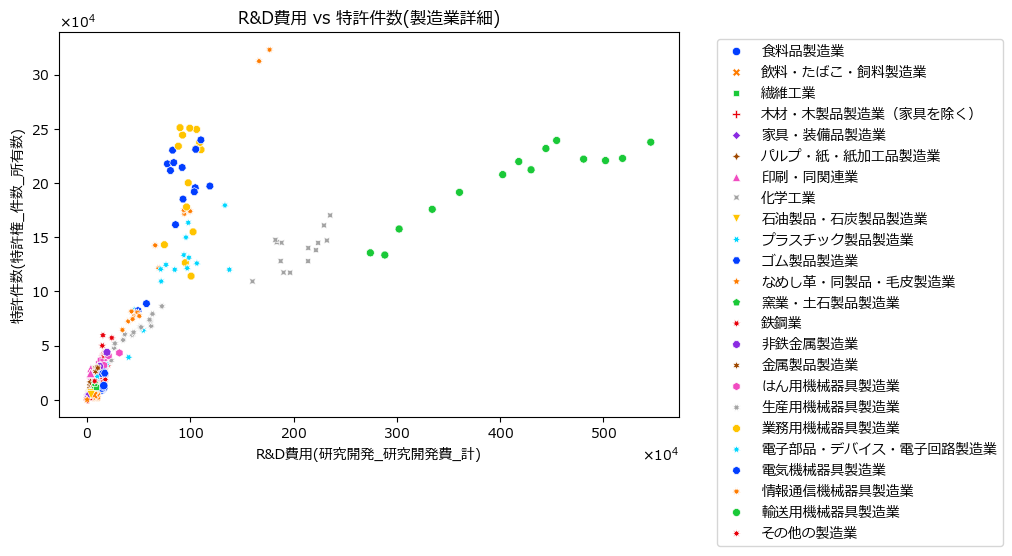

In [ ]:
# Scatter plot: R&D費用 vs 特許件数(製造業詳細)

#Filter to manufacturing industry
manufacturing_industry_cd_list = ["090","091","092","093","099","100","101","102","110","111","112","113","114","115","119","120","121","129","130","140","141","142","150","160","161","162","163","164","169","170","171","179","180","190","191","199","200","210","211","212","219","220","221","222","230","231","232","240","241","249","250","251","252","253","259","260","261","262","270","271","273","274","275","276","280","290","291","292","293","299","300","301","302","310","311","319","320"]

#If the last digit of industry_id is 0, it represents a medium classification; otherwise, it represents a small classification.
medium_class_manufacturing_industry_cd_list = [i for i in manufacturing_industry_cd_list if int(i) % 10 == 0]
target_index = merged_patent_r_and_d_df["industry_id"].isin(medium_class_manufacturing_industry_cd_list)

plt.figure(figsize=(8, 5))
ax = sns.scatterplot(data=merged_patent_r_and_d_df[target_index], x="r_and_d_total", y="patent_count", hue="industry_name", palette="bright", style="industry_name")
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((4, 4))
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
plt.xlabel("R&D費用(研究開発_研究開発費_計)")
plt.ylabel("特許件数(特許権_件数_所有数)")
plt.title("R&D費用 vs 特許件数(製造業詳細)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

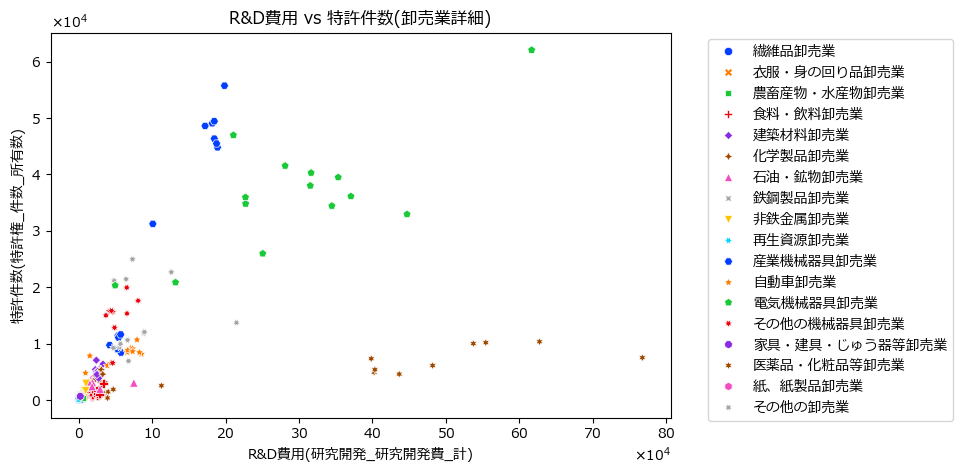

In [42]:
# Scatter plot: R&D費用 vs 特許件数(卸売業詳細)

#Filter to wholesale industry
wholesale_industry_cd_list = ["511","512","521","522","531","532","533","534","535","536","541","542","543","549","551","552","553","559"]
target_index = merged_patent_r_and_d_df["industry_id"].isin(wholesale_industry_cd_list)

plt.figure(figsize=(8, 5))
ax = sns.scatterplot(data=merged_patent_r_and_d_df[target_index], x="r_and_d_total", y="patent_count", hue="industry_name", palette="bright", style="industry_name")
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((4, 4))
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
plt.xlabel("R&D費用(研究開発_研究開発費_計)")
plt.ylabel("特許件数(特許権_件数_所有数)")
plt.title("R&D費用 vs 特許件数(卸売業詳細)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

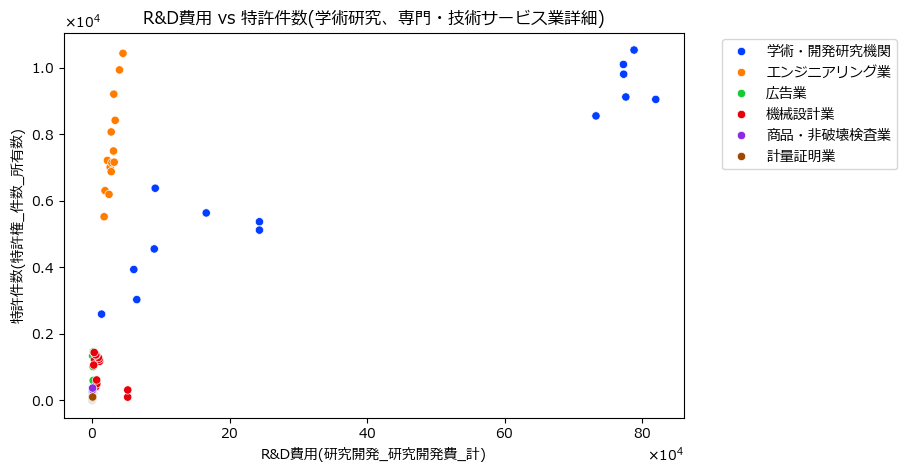

In [ ]:
# Scatter plot: R&D費用 vs 特許件数(学術研究、専門・技術サービス業詳細)

#Filter to academic research, professional and technical services
academic_related_industry_cd_list = ["710","726","728","730","743","744","745","746"]
target_index = merged_patent_r_and_d_df["industry_id"].isin(academic_related_industry_cd_list)

plt.figure(figsize=(8, 5))
ax = sns.scatterplot(data=merged_patent_r_and_d_df[target_index], x="r_and_d_total", y="patent_count", hue="industry_name", palette="bright", style="industry_name")
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((4, 4))
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
plt.xlabel("R&D費用(研究開発_研究開発費_計)")
plt.ylabel("特許件数(特許権_件数_所有数)")
plt.title("R&D費用 vs 特許件数(学術研究、専門・技術サービス業詳細)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

2-2-3. Discussion: R&D費用 vs 特許件数<br>
When comparing the hypothesis and the results … (TODO)

<div style="font-size: 150%">
    2-3. Time series: 年ごとの特許件数合計
</div>

2-3-1. Hypothesis: Time series(年ごとの特許件数合計)<br>
According to 骨太の方針 and previous studies … (TODO)

2-3-2. Time series: 年ごとの特許件数合計

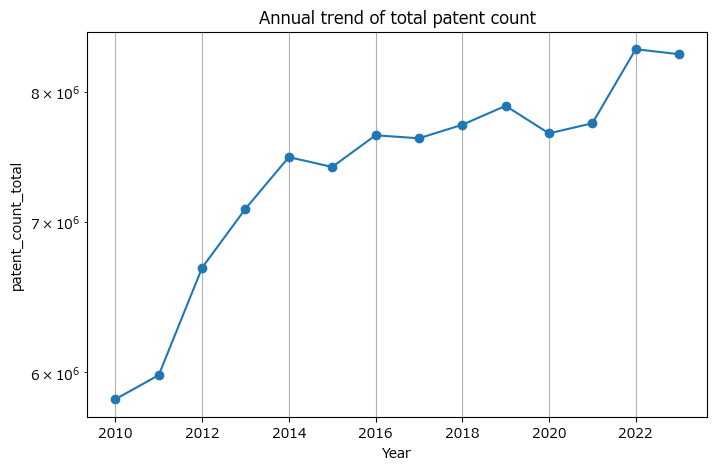

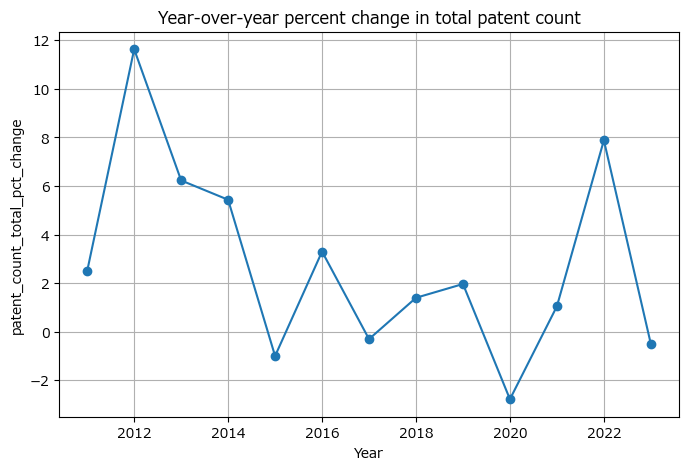

In [ ]:
plt.figure(figsize=(8, 5))
yearly_patent = merged_patent_r_and_d_df.groupby("year")["patent_count"].sum()
yearly_patent.plot(marker='o')
plt.xlabel("Year")
plt.ylabel("patent_count_total")
plt.yscale('log')
plt.title("Annual trend of total patent count")
plt.grid(True)
plt.show()

# Time series: pct_change
plt.figure(figsize=(8, 5))
yearly_patent_change = yearly_patent.pct_change(1).multiply(100)
yearly_patent_change.plot(marker='o')
plt.xlabel("Year")
plt.ylabel("patent_count_total_pct_change")
plt.title("Year-over-year percent change in total patent count")
plt.grid(True)
plt.show()

2-3-3. Discussion: Time series(年ごとの特許件数合計)
When comparing the hypothesis and the results … (TODO)

<div style="font-size: 150%">
    2-4. Histgram: 産業別のR&D費用, 企業数, 売上
</div>

2-4-1. Hypothesis: Histgram(産業別のR&D費用, 企業数, 売上)<br>
According to 骨太の方針 and previous studies … (TODO)

2-4-2. Histgram(産業別のR&D費用, 企業数, 売上)

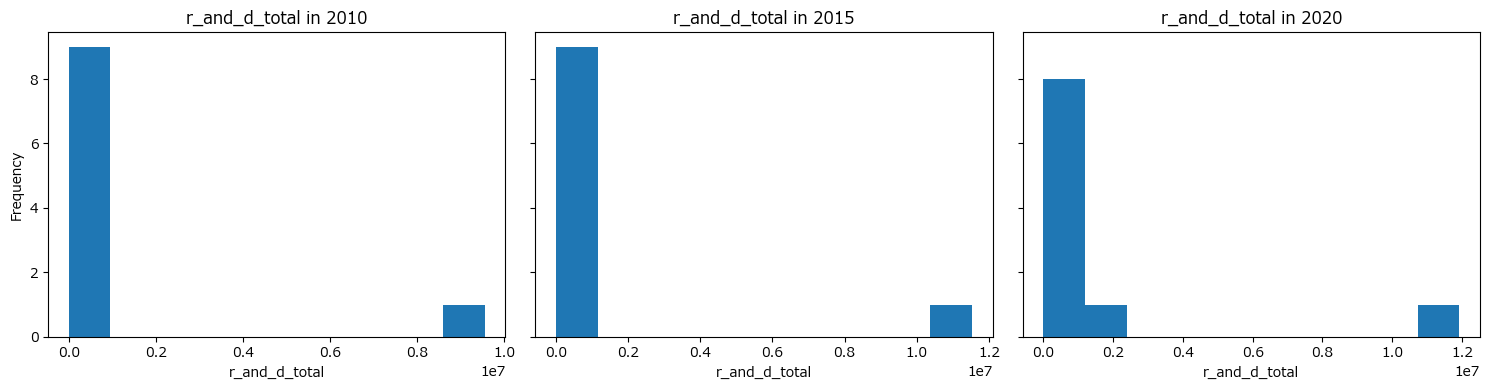

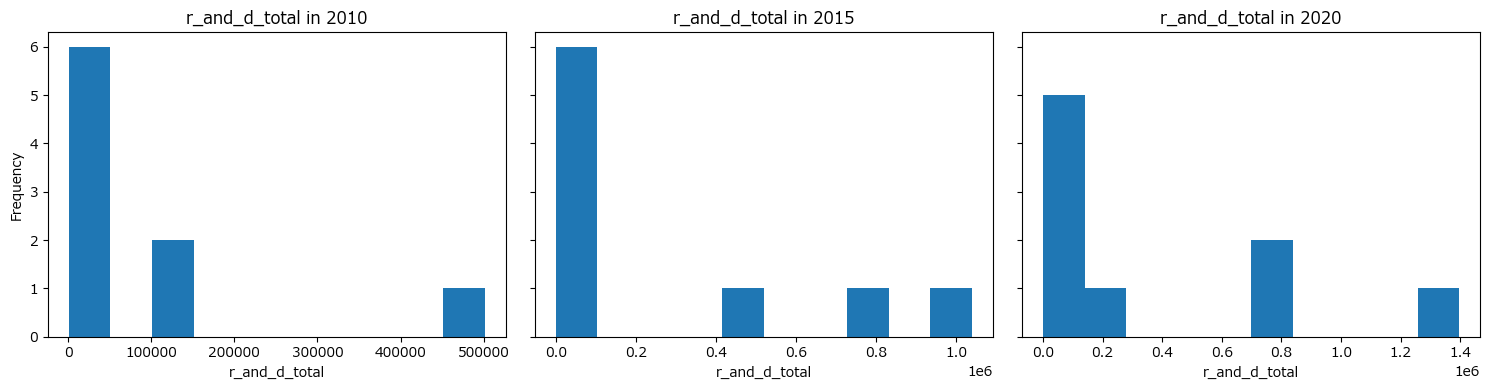

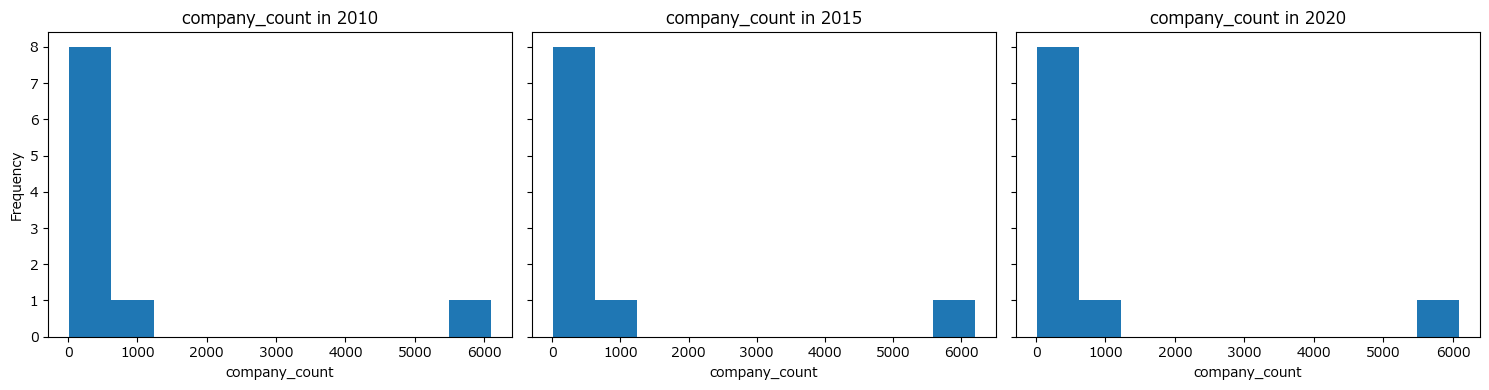

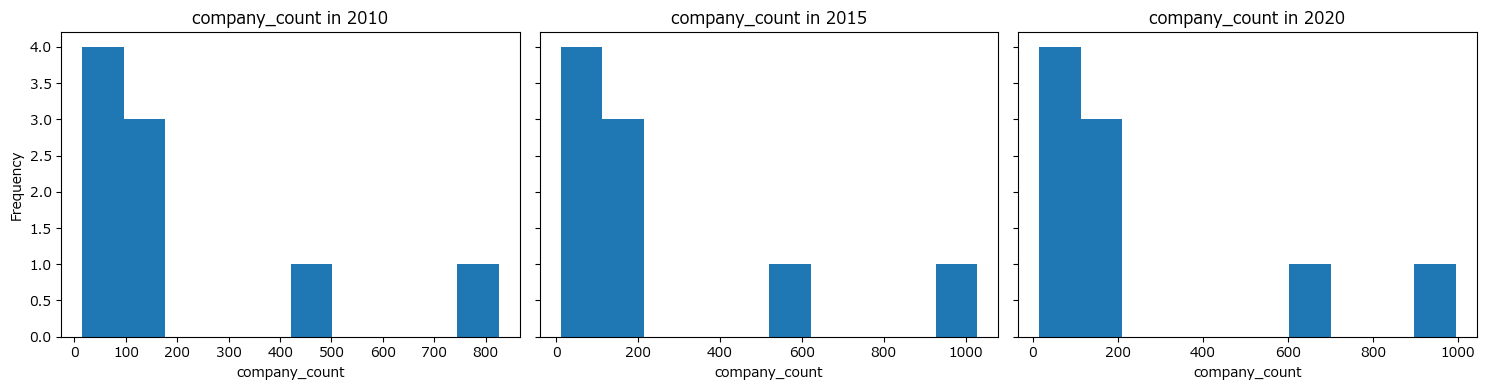

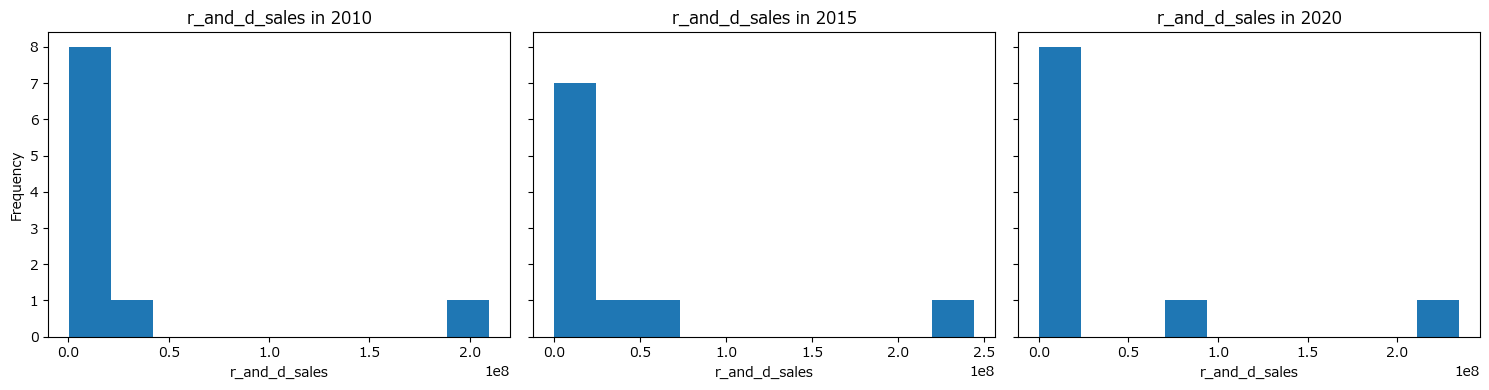

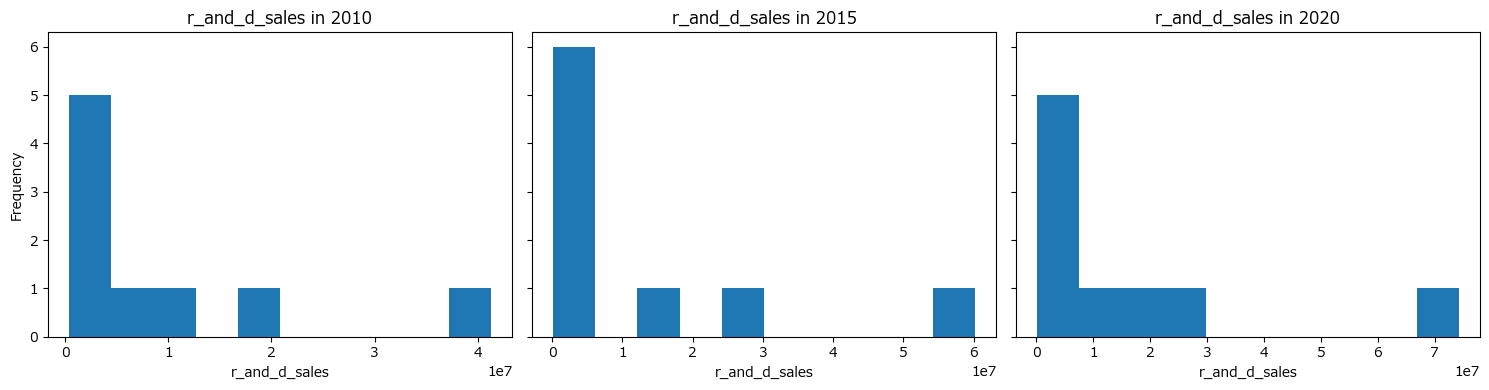

In [ ]:
def make_histogram(df:pd.DataFrame, target_column:str, years:list, industries:list = [], exclude_industries:bool = False):
    df = df[df["year"].isin(years)]

    if industries is not None and exclude_industries is False:
        df = df[df['industry'].isin(industries)]
    elif industries is not None and exclude_industries is True:
        df = df[~df['industry'].isin(industries)]
    else:
        pass

    fig, axes = plt.subplots(1, len(years), figsize=(15, 4), sharey=True)
    for i, year in enumerate(years):
        if i == 0:
            axes[i].set_ylabel('Frequency')
        axes[i].hist(df[df["year"] == year][target_column].map(float))
        axes[i].set_title(f'{target_column} in {year}')
        axes[i].set_xlabel(target_column)

large_industries_list = [
    #'鉱業、採石業、砂利採取業',
    '製造業',
    '電気・ガス業',
    '情報通信業',
    '卸売業',
    '小売業',
    #'クレジットカード業、割賦金融業',
    #'物品賃貸業',
    '学術研究、専門・技術サービス業',
    '飲食サービス業',
    '生活関連サービス業、娯楽業',
    #'個人教授所',
    'サービス業（その他のサービス業）',
    'その他の産業'
]

large_industries_without_manufacturing_list = [
    #'鉱業、採石業、砂利採取業',
    # '製造業',
    '電気・ガス業',
    '情報通信業',
    '卸売業',
    '小売業',
    #'クレジットカード業、割賦金融業',
    #'物品賃貸業',
    '学術研究、専門・技術サービス業',
    '飲食サービス業',
    '生活関連サービス業、娯楽業',
    #'個人教授所',
    'サービス業（その他のサービス業）',
    'その他の産業'
]

years = [2010,2015,2020]

r_and_d_df = r_and_d_df_org.copy(deep=True)
# Remove NaN rows
r_and_d_df = r_and_d_df.replace(["", "ｘ", "x", "Ｘ", "***"], np.nan)

# make R&D investment histogram of large industries
make_histogram(r_and_d_df, target_column="r_and_d_total", years=years, industries=large_industries_list)
plt.tight_layout()

# make R&D investment histogram of large industries except manufacturing
make_histogram(r_and_d_df, target_column="r_and_d_total", years=years, industries=large_industries_without_manufacturing_list)
plt.tight_layout()

# make company count histogram of large industries
make_histogram(r_and_d_df, target_column="company_count", years=years, industries=large_industries_list)
plt.tight_layout()

# make company count histogram of large industries except manufacturing
make_histogram(r_and_d_df, target_column="company_count", years=years, industries=large_industries_without_manufacturing_list)
plt.tight_layout()

# make company sales histogram of large industries
make_histogram(r_and_d_df, target_column="r_and_d_sales", years=years, industries=large_industries_list)
plt.tight_layout()

# make company sales histogram of large industries except manufacturing
make_histogram(r_and_d_df, target_column="r_and_d_sales", years=years, industries=large_industries_without_manufacturing_list)
plt.tight_layout()

2-4-3. Discussion: Histgram(産業別のR&D費用, 企業数, 売上)<br>
When comparing the hypothesis and the results … (TODO)

<div style="font-size: 150%">
    2-5. Regression
</div>

In [16]:
# Data loading
df = pd.read_csv('/Users/kohsukesagara/Desktop/graspp-25S-innovation/notebooks/assignment_group/Milestone2/panel_data.csv')

# Data preprocessing
analysis_df = df[['year', 'industry', 'industry_id', 'company_count', 
                  'randd_total', 'patent_count']].copy()

# Remove missing values
analysis_df = analysis_df.dropna()

# Convert numeric columns to appropriate types
numeric_columns = ['company_count', 'randd_total', 'patent_count']
for col in numeric_columns:
    analysis_df[col] = pd.to_numeric(analysis_df[col], errors='coerce')

# Remove missing values again
analysis_df = analysis_df.dropna()

# Prepare panel data (industry_id as entity, year as time dimension)
panel_df = analysis_df.set_index(['industry_id', 'year'])

print(f"Panel data shape: {panel_df.shape}")
print(f"Number of industries: {len(panel_df.index.get_level_values(0).unique())}")
print(f"Number of years: {len(panel_df.index.get_level_values(1).unique())}")

print("=== Simple Regression Model (Pooled OLS) ===")

# Pooled OLS (no fixed effects)
dependent = panel_df['patent_count']
exog = panel_df[['randd_total']]

pooled_model = PanelOLS(dependent, exog)
pooled_results = pooled_model.fit(cov_type='robust')

print(pooled_results.summary)

print("\n=== Fixed Effects Model ===")

# Fixed Effects Model (entity fixed effects)
dependent = panel_df['patent_count']
exog = panel_df[['randd_total', 'company_count']]  # company_count as proxy for employment

fe_model = PanelOLS(dependent, exog, entity_effects=True)
fe_results = fe_model.fit(cov_type='clustered', cluster_entity=True)

print(fe_results.summary)

print("\n=== Fixed Effects Model (Log-transformed) ===")

# Log transformation (adding 1 to handle zero values)
panel_df['log_patent'] = np.log(panel_df['patent_count'] + 1)
panel_df['log_randd'] = np.log(panel_df['randd_total'] + 1)
panel_df['log_company'] = np.log(panel_df['company_count'] + 1)

# Log-transformed Fixed Effects Model
dependent_log = panel_df['log_patent']
exog_log = panel_df[['log_randd', 'log_company']]

fe_model_log = PanelOLS(dependent_log, exog_log, entity_effects=True)
fe_results_log = fe_model_log.fit(cov_type='clustered', cluster_entity=True)

print(fe_results_log.summary)

print("\n=== Fixed Effects Model with Time Effects ===")

# Two-way fixed effects model (entity + time fixed effects)
fe_time_model = PanelOLS(dependent, exog, entity_effects=True, time_effects=True)
fe_time_results = fe_time_model.fit(cov_type='clustered', cluster_entity=True)

print(fe_time_results.summary)

print("\n=== Model Results Comparison ===")

print(f"\n1. Pooled OLS:")
print(f"   R&D Expenditure Coefficient: {pooled_results.params['randd_total']:.6f}")
print(f"   R²: {pooled_results.rsquared:.4f}")

print(f"\n2. Fixed Effects (Entity):")
print(f"   R&D Expenditure Coefficient: {fe_results.params['randd_total']:.6f}")
print(f"   Company Count Coefficient: {fe_results.params['company_count']:.6f}")
print(f"   R²: {fe_results.rsquared:.4f}")

print(f"\n3. Fixed Effects (Log-transformed):")
print(f"   log(R&D Expenditure) Coefficient: {fe_results_log.params['log_randd']:.6f}")
print(f"   log(Company Count) Coefficient: {fe_results_log.params['log_company']:.6f}")
print(f"   R²: {fe_results_log.rsquared:.4f}")

print(f"\n4. Fixed Effects (Entity + Time):")
print(f"   R&D Expenditure Coefficient: {fe_time_results.params['randd_total']:.6f}")
print(f"   Company Count Coefficient: {fe_time_results.params['company_count']:.6f}")
print(f"   R²: {fe_time_results.rsquared:.4f}")

# Elasticity interpretation
elasticity = fe_results_log.params['log_randd']
print(f"\n【Elasticity Interpretation】")
print(f"R&D Expenditure-Patent Application Elasticity: {elasticity:.3f}")
print(f"→ A 1% increase in R&D expenditure leads to approximately {elasticity:.1f}% change in patent applications")

print("\n" + "="*80)
print("ECONOMIC INTERPRETATION AND POLICY IMPLICATIONS")
print("="*80)

print("\n【Key Findings】")
print("1. R&D expenditure consistently shows a positive and significant effect on patent applications")
print("2. The effect remains robust even after controlling for industry-specific characteristics")
print("3. The elasticity suggests that R&D investment has a less than proportional effect on patents")

print("\n【Model Comparison Insights】")
print("• Pooled OLS vs Fixed Effects: Controlling for industry heterogeneity reduces the coefficient,")
print("  suggesting that cross-industry differences were creating upward bias")
print("• Log-transformed model: Provides elasticity interpretation - a 1% increase in R&D")
print(f"  expenditure increases patent applications by {elasticity:.1f}%")
print("• Two-way Fixed Effects: Controls for both industry-specific and time-specific factors")

print("\n【Policy Implications】")
print("1. R&D Promotion Policies are Effective:")
print("   - Tax incentives and subsidies for R&D can effectively increase patent output")
print("   - The positive coefficient validates government R&D support programs")

print("2. Industry-Specific Approach Needed:")
print("   - Significant industry fixed effects suggest different R&D efficiency across industries")
print("   - Tailored policies may be more effective than one-size-fits-all approaches")

print("3. Diminishing Returns to R&D:")
print(f"   - Elasticity < 1 ({elasticity:.3f}) indicates diminishing returns to R&D investment")
print("   - Suggests optimal R&D investment levels exist")

print("\n【Business Strategy Implications】")
print("1. R&D Investment ROI: Clear evidence that R&D spending translates to intellectual property")
print("2. Scale Effects: Company count coefficient shows importance of organizational capacity")
print("3. Industry Context Matters: R&D effectiveness varies significantly by industry")

print("\n【Statistical Robustness】")
print("• The consistent positive coefficients across all models indicate robust results")
print("• Fixed effects methodology addresses endogeneity concerns from unobserved industry characteristics")
print("• Clustered standard errors account for within-industry correlation")

print("\n【Limitations and Future Research】")
print("1. Causality: While fixed effects improve causal inference, reverse causality may still exist")
print("2. Time Lags: R&D effects on patents may have longer time horizons not captured")
print("3. Quality vs Quantity: Patent count doesn't reflect patent quality or economic value")
print("4. Innovation Spillovers: Inter-industry knowledge spillovers not explicitly modeled")

print(f"\n【Bottom Line】")
print("R&D investment is a reliable driver of patent generation, but the relationship")
print("exhibits diminishing returns and significant industry heterogeneity. This supports")
print("targeted R&D policies that account for industry-specific characteristics and")
print("optimal investment thresholds.")

Panel data shape: (1893, 4)
Number of industries: 147
Number of years: 14
=== Simple Regression Model (Pooled OLS) ===
                          PanelOLS Estimation Summary                           
Dep. Variable:           patent_count   R-squared:                        0.9655
Estimator:                   PanelOLS   R-squared (Between):              0.9559
No. Observations:                1893   R-squared (Within):               0.5602
Date:                Mon, Jun 09 2025   R-squared (Overall):              0.9655
Time:                        09:49:27   Log-likelihood                -2.286e+04
Cov. Estimator:                Robust                                           
                                        F-statistic:                   5.292e+04
Entities:                         147   P-value                           0.0000
Avg Obs:                       12.878   Distribution:                  F(1,1892)
Min Obs:                       1.0000                                  